In [291]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px



In [292]:
df = pd.read_csv('Data2.csv', sep=';', encoding='cp1252')

In [293]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


In [294]:
df.rename(columns={"Populatiion": "Population"}, inplace=True)

In [295]:
df['Area'] = df['Area'].str.replace(',', '.').astype(float)
df["GDP per capita"] = df["GDP per capita"].str.replace(',', '.').astype(float)
df["CO2 emission"] = df["CO2 emission"].str.replace(',', '.').astype(float)

In [296]:
fix_gdp = df[df['GDP per capita'] < 0]
area_gdp = df[df['Area'] < 0]
fix_gdp['GDP per capita'] *= -1
area_gdp['Area'] *= -1
df[df['GDP per capita'] < 0] = fix_gdp
df[df['Area'] < 0] = area_gdp
df = df.fillna(df.mean())


df.head()

/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_61526/2024429878.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_61526/2024429878.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_61526/2024429878.py:7: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' 

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0


In [297]:
df['Population density'] = df['Population'] / df['Area']

In [298]:
# Selecting the features for clustering
X = df[['GDP per capita', 'Population density']]

km_kwargs = {
    'init': 'random',
    'n_clusters': 4,
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}
# Using KMeans clustering algorithm to cluster the data
km = KMeans(**km_kwargs)
km.fit(X)

# Adding the predicted cluster labels to the original data
df['Cluster'] = km.labels_

# Grouping the data by region and cluster and calculating the mean for each group
region_cluster_means = df.groupby(['Region', 'Cluster']).mean()

# Sorting the data by GDP per capita and population density
sorted_data = region_cluster_means.sort_values(['GDP per capita', 'Population density'], ascending=False)

# Displaying the dominant region for GDP per capita and population density clusters
print('\n\n')
print("Dominant region for GDP per capita cluster: ", sorted_data.loc[sorted_data['GDP per capita'].idxmax()].name[0])
print("Dominant region for population density cluster: ", sorted_data.loc[sorted_data['Population density'].idxmax()].name[0])
print('\n\n')




Dominant region for GDP per capita cluster:  Europe & Central Asia
Dominant region for population density cluster:  East Asia & Pacific





/var/folders/pl/17z0ddz94xs40jk4spqp7bwc0000gn/T/ipykernel_61526/1526395345.py:19: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [299]:
fig = px.scatter(
    df, x='GDP per capita', y='Population density', color=km.labels_,
    hover_data=['Country Name', 'Region'],
    width=800, height=600
)

fig.update(layout_coloraxis_showscale=False)

fig.show()

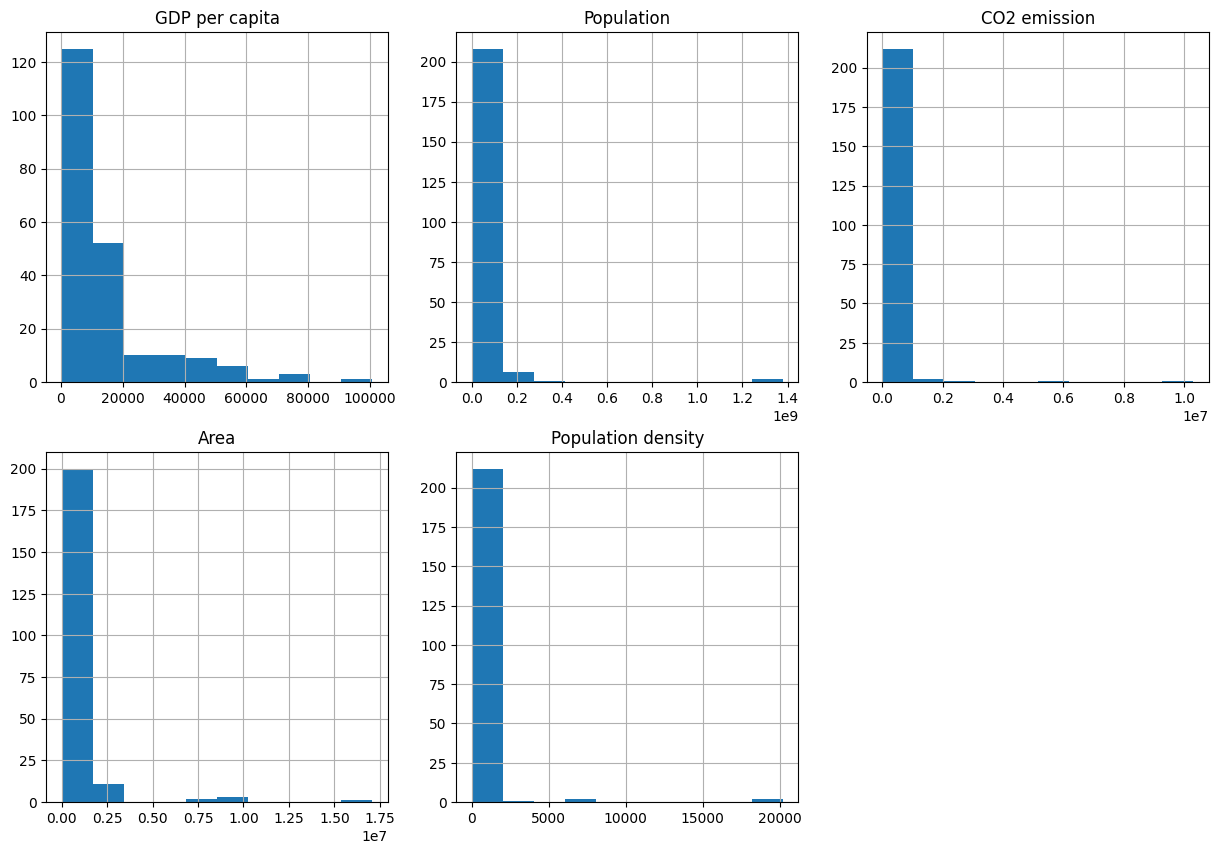

In [300]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

labels = df.columns[2:]

for i in range(len(labels)):
    ax_i = (i // 3,  i % 3)
    axes[ax_i].set_title(labels[i])
    axes[ax_i].grid('-')
    axes[ax_i].hist(df[labels[i]])

fig.delaxes(axes[1][2])


In [301]:
import numpy as np
from scipy.stats import pearsonr

def linear_relationship(x, y):
    # Calculating the correlation coefficient and p-value
    corr, p_value = pearsonr(x, y)
    print(f'Correlation coefficient: {corr}')
    
    # Checking if the absolute value of the correlation coefficient is greater than 0.8
    if abs(corr) > 0.8:
        return True
    else:
        return False


In [302]:
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = -x + np.random.normal(0, 10, 1000)

linear_relationship(x, y)

Correlation coefficient: -0.8223789298733445


True